In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the data
from sklearn.datasets import load_wine

wine = load_wine() # load a bunch file

type(wine)

sklearn.utils._bunch.Bunch

What is a bunch file?: it is similar to a dictionary where we have a key and a value, but in this case, the key is a string and the value is a bunch file. It is useful when we have a lot of parameters to pass to a function, and we don't want to pass them one by one. Instead, we can pass a bunch file with all the parameters. 

In [6]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
# convert the data into a pandas dataframe
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# add the target variable to the dataframe
data['target'] = wine.target

# check the top 5 rows
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


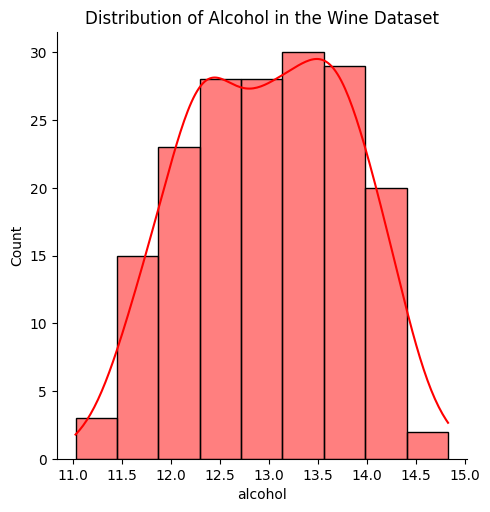

In [10]:
# plot the distribution of the alcohol column
sns.displot(data['alcohol'], kde=True, color='red')
plt.title('Distribution of Alcohol in the Wine Dataset')
plt.show()

When fitting ml models you need to create your tain and test datasets.

- Train dataset: it is used to train the model. (80% of the data)
- Test dataset: it is used to evaluate the model. (20% of the data)


In [12]:
# create our feature and target variables
from sklearn.model_selection import train_test_split

X = data.drop(['target','alcohol'], axis=1)
y = data['alcohol']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 12), (36, 12), (142,), (36,))

In [14]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# score model on the testing data
model.score(X_test, y_test)

0.6889364317843769

In [16]:
# make predictions  
y_pred = model.predict(X_test)

# check our r2 score
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score: ', r2_score(y_test, y_pred))
print('Mean square error: ', mean_squared_error(y_test, y_pred))

R2 score:  0.6889364317843769
Mean square error:  0.18571608706852738


In [18]:
# Optional: Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Intercept: ', model.intercept_)
print(coefficients)

Intercept:  10.975812731749517
                              Coefficient
malic_acid                       0.112887
ash                              0.268318
alcalinity_of_ash               -0.046854
magnesium                       -0.001801
total_phenols                    0.091979
flavanoids                      -0.010802
nonflavanoid_phenols            -0.124330
proanthocyanins                 -0.142778
color_intensity                  0.169749
hue                              0.403695
od280/od315_of_diluted_wines     0.119319
proline                          0.000990


In [26]:
## make a prediction using one sample row and compare the actual value
sample = X_train.sample()
print('Actual value: ', y_train.loc[sample.index[0]])
print('Predicted value: ', model.predict(sample))

Actual value:  11.45
Predicted value:  [12.61956995]
